In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [26]:
df = pd.read_excel('나홀로여행_results.xlsx')

In [27]:
df.drop(columns='Unnamed: 0',inplace=True)

In [28]:
df['text'] = "삭제"
df.fillna('',inplace=True)
for i in range(0,1000):
    try:
    
        df['text'].iloc[i] = df['t1'].iloc[i] + " " + df['t2'].iloc[i] + " " + df['t3'].iloc[i] + " " + df['t4'].iloc[i] + " " + df['t5'].iloc[i] + " " + df['t6'].iloc[i] + " " + df['t7'].iloc[i] + " " + df['t8'].iloc[i] + " " + df['t9'].iloc[i] + " " + df['t10'].iloc[i] + " " + df['t11'].iloc[i] + " " + df['t12'].iloc[i] + " " + df['t13'].iloc[i] + " " + df['t14'].iloc[i] + " " + df['t15'].iloc[i] + " " + df['t16'].iloc[i] + " " + df['t17'].iloc[i] + " " + df['t18'].iloc[i] + " " + df['t19'].iloc[i] + " " + df['t20'].iloc[i]
    except Exception:
        pass

In [29]:
df['text']=df['text'].str.strip()

In [30]:
index_=df[df['text'] == ''].index

In [31]:
df.drop(index_,inplace=True)

In [32]:
df

,account,date,t1,t2,t3,t4,t5,t6,t7,t8,...,t12,t13,t14,t15,t16,t17,t18,t19,t20,text
0,sungzu_01,2주,일상,일상스타그램,데일리,데일리스타그램,dailylook,헬스,얼빡샷,나홀로여행,...,,,,,,,,,,일상 일상스타그램 데일리 데일리스타그램 dailylook 헬스 얼빡샷 나홀로여행 여행
1,onejinkyung,13주,부산겹벚꽃,경주겹벚꽃,wonchu,,,,,,...,,,,,,,,,,부산겹벚꽃 경주겹벚꽃 wonchu
2,s_hungs02,8주,02년생,20살,차쟁이,드라이브,일상,바다구경,전망대,바다갬성,...,혼자만의시간,,,,,,,,,02년생 20살 차쟁이 드라이브 일상 바다구경 전망대 바다갬성 해안도로 나홀로여행 ...
4,stayfolio,6주,썸원스페이지숲,스테이폴리오,스테이폴리오,춘천,숲속뷰,,,,...,,,,,,,,,,썸원스페이지숲 스테이폴리오 스테이폴리오 춘천 숲속뷰
6,l_y_ring,5주,행복한,연차,휴가,나홀로여행,경주여행,경주당일치기,황리단길,대릉원,...,혼여행,너무좋아요,,,,,,,,행복한 연차 휴가 나홀로여행 경주여행 경주당일치기 황리단길 대릉원 경주월드 혼술 경...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,tak_a_p,3주,캐논,캐논dslr,캐논800d,2470mmf28,신계륵,여름밤,제주,제주도,...,사진,사진스타그램,포토스타그램,사진소통,사진맞팔,사진작가,,,,캐논 캐논dslr 캐논800d 2470mmf28 신계륵 여름밤 제주 제주도 반딧불 ...
995,a_eun_go,3주,나홀로여행,,,,,,,,...,,,,,,,,,,나홀로여행
997,yee_hw,3주,제주도,나홀로여행,여행스타그램,우도,제트보트,selfie,,,...,,,,,,,,,,제주도 나홀로여행 여행스타그램 우도 제트보트 selfie
998,hyeonga_travel,3주,hyeongain,택이네조개전골,여행기록,뚜벅이여행,여행코스,selfie,ootd,오오티디,...,셀카,셀피,뚜벅이여행,여행에미치다,여행스타그램,국내여행,,,,hyeongain 택이네조개전골 여행기록 뚜벅이여행 여행코스 selfie ootd ...


In [33]:
df.reset_index(inplace=True)

In [34]:
from konlpy.tag import Twitter

In [35]:
tagger = Twitter()

c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(stop_words=dd,
                        lowercase=True,
                        max_features=1000)

NameError: name 'dd' is not defined

In [ ]:
content = df['text']

In [ ]:
tdm = tfidf.fit_transform(content)

In [38]:
def get_nouns(text):
    nouns = tagger.nouns(text)
    nouns = [word for word in nouns if len(word) > 1]
    return nouns

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer()

In [41]:
cv = CountVectorizer(max_features=1000, tokenizer=get_nouns)

In [42]:
tdm = cv.fit_transform(df['text'])

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tdm2 = tfidf.fit_transform(tdm)
words = cv.get_feature_names()

In [44]:
count = tdm.sum(axis=0)

In [45]:
df23 = pd.DataFrame(words)
df23['count'] = count[0].tolist()[0]

In [46]:
df23.rename(columns={0:'word'},inplace=True)

In [47]:
df23

,word,count
0,가든,3
1,가람동,4
2,가방,5
3,가슴,10
4,가야,4
...,...,...
995,휴식,14
996,휴양림,2
997,흰여울,9
998,힐링,111


In [48]:
import numpy as np
import konlpy
import csv
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gensim
import gensim.corpora as corpora
for i, document in tqdm(enumerate(df['text'])):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document,stem=True): #Letimazation
        #if word[1] in ['Noun']:
        clean_words.append(word[0])
        #    clean_words.append(word[0])
    document = ' '.join(clean_words)

864it [00:03, 245.97it/s]


In [49]:
df['text']

0        일상 일상스타그램 데일리 데일리스타그램 dailylook 헬스 얼빡샷 나홀로여행 여행
1                                     부산겹벚꽃 경주겹벚꽃 wonchu
2      02년생 20살 차쟁이 드라이브 일상 바다구경 전망대 바다갬성 해안도로 나홀로여행 ...
3                           썸원스페이지숲 스테이폴리오 스테이폴리오 춘천 숲속뷰
4      행복한 연차 휴가 나홀로여행 경주여행 경주당일치기 황리단길 대릉원 경주월드 혼술 경...
                             ...                        
859    캐논 캐논dslr 캐논800d 2470mmf28 신계륵 여름밤 제주 제주도 반딧불 ...
860                                                나홀로여행
861                      제주도 나홀로여행 여행스타그램 우도 제트보트 selfie
862    hyeongain 택이네조개전골 여행기록 뚜벅이여행 여행코스 selfie ootd ...
863    2021년5월1일 나홀로여행 시간여행 강릉여행 금학칼국수 맛있어맛있어 경포대해수욕장...
Name: text, Length: 864, dtype: object

In [50]:
text_list = df['text'].tolist()

In [51]:
text_list

['일상 일상스타그램 데일리 데일리스타그램 dailylook 헬스 얼빡샷 나홀로여행 여행',
 '부산겹벚꽃 경주겹벚꽃 wonchu',
 '02년생 20살 차쟁이 드라이브 일상 바다구경 전망대 바다갬성 해안도로 나홀로여행 혼드라이브 혼자만의시간',
 '썸원스페이지숲 스테이폴리오 스테이폴리오 춘천 숲속뷰',
 '행복한 연차 휴가 나홀로여행 경주여행 경주당일치기 황리단길 대릉원 경주월드 혼술 경주 혼여행 너무좋아요',
 '대학로 나홀로여행 동네카페',
 '이집트여행 이슬람사원 랜선여행 아프리카여행기 여자혼자여행 나홀로여행 191015 추억 아프리카여행 6대륙여행 세계여행 버킷리스트 이집트 여행 해외여행 구름 나무',
 '여행 나홀로여행 강릉여행 여름휴가 강원도여행 당일치기 코로나조심 셀카 셀피 셀스타그램 얼스타그램 selfie selca selstagram ootd outfitoftheday ootdfashion',
 '코시국 홈술 혼술 나가지마 진심 집콕 간식 희소마켓 간식스타그램 슬기로운의사생활 슬기로운생활 맥주 안주 술 술안주 술안주만들기 나홀로여행',
 '같은산인데 같은산이아닌 같은곳인데 같은곳이아닌 설악산 나홀로여행 자유산행 혼산 걷기 트레킹 trekking health 힐링 셀카 outdoor 아웃도어 여행',
 '강원도고성군 속초닭강정 속초맥주 나홀로여행',
 '날좋은 스위스에서 나홀로여행 그린델발트 쏘쏘',
 '여행스타그램 나홀로여행 뜻밖의행복 양 방긋샷 더위',
 '설악산 속초 나홀로여행 자유산행 혼산 걷기 트레킹 trekking health 힐링 셀카 outdoor 아웃도어 여행 travel 등산 등산스타그램',
 '제주도가고싶다 한라수목원 제주앓이 jeju 제주도 제주 제주바다 바다 제주여행 special localguide letsguide dailyshot photo photography canon6dmark2',
 '나홀로여행',
 'travelphotography tb photooftheday koreatravel somewheremaga

In [52]:
text_result =[]

In [53]:
for i, document in tqdm(enumerate(text_list)):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document,stem=True): #Letimazation
        if word[1] in ['Noun']:
            clean_words.append(word[0])
    document = ' '.join(clean_words)
    text_result.append(document)

864it [00:03, 255.30it/s]


In [54]:
text_result

['일상 일상 스타 그램 데 일리 데일 리스 그램 헬스 얼빡샷 나 홀로 여행 여행',
 '부산 겹 벚꽃 경주 겹 벚꽃',
 '살 차 드라이브 일상 바다 구경 전망대 바다 성 해안 도로 나 홀로 여행 혼 드라이브 혼자 시간',
 '썸 원스 페이지 숲 스테이 폴리오 스테이 폴리오 춘천 숲속 뷰',
 '연차 휴가 나 홀로 여행 경주 여행 경주 당일치기 황리 대릉 경주월드 혼술 경주 혼 여행',
 '대학로 나 홀로 여행 동네 카페',
 '이집트 여행 이슬람 사원 랜선 여행 아프리카 여행기 여자 혼자 여행 나 홀로 여행 추억 아프리카 여행 대륙 여행 세계 여행 버킷리스트 이집트 여행 해외여행 구름 나무',
 '여행 나 홀로 여행 강릉 여행 여름 휴가 강원도 여행 당일치기 코로나 조심 셀카 셀피 셀 스타 그램 얼 스타 그램',
 '코 시국 홈술 혼술 진심 집콕 간식 희소 마켓 간식 스타 그램 사생활 생활 맥주 안주 술 술안주 술안주 만들기 나 홀로 여행',
 '산 산이 곳 곳 설악산 나 홀로 여행 자유 산행 혼산 걷기 트레킹 힐링 셀카 아웃도어 여행',
 '강원도 고성군 속초 닭강정 속초 맥주 나 홀로 여행',
 '날 스위스 나 홀로 여행 그린 델 발트',
 '여행 스타 그램 나 홀로 여행 뜻밖 행복 양 방 긋샷 더위',
 '설악산 속초 나 홀로 여행 자유 산행 혼산 걷기 트레킹 힐링 셀카 아웃도어 여행 등산 등산 스타 그램',
 '제주도 한라 수목원 제주 앓이 제주도 제주 제주 바다 바다 제주 여행',
 '나 홀로 여행',
 '아이폰 사진가 감성 사진 사진 여행 스타 그램 여행 기록',
 '아이폰 사진가 감성 사진 사진 여행 스타 그램 여행 기록',
 '경남 거제도 나 홀로 여행 휴무 유호 전망대 바릇 해물 라면 바다 뷰 시방 리 카페 거가대교 뷰',
 '제주 카페 애월 카페 제주 애월 카페 제주 족욕 카페 애 월족 욕 카페 제주 애 월족 욕 카페 제주 이색 카페 제주 곳 제주 여행 가족 여행 커플 여행 신혼여행 나 홀로 여행',
 '나 홀로 여행 인스타 색감 보정 삼

In [183]:
vectorize = CountVectorizer(tokenizer=get_nouns,min_df=50)
X = vectorize.fit_transform(text_result)
features = vectorize.get_feature_names()
Vector_Matrix = np.array(X.toarray())
X_np = np.array(X.toarray())
df = pd.DataFrame(X_np)
df.to_csv("Text_code_result2.csv",encoding="utf-8-sig",index = features,header = features)

In [179]:
df3 = df.T.dot(df)

In [180]:
df3.index=features

In [181]:
df3.columns = features

In [182]:
df3.to_csv("result.csv",encoding="utf-8-sig")

SyntaxError: invalid syntax (<ipython-input-10-40dc312f7812>, line 1)

In [17]:
!pip install wordcloud
!pip install matplotlib


You should consider upgrading via the 'c:\users\minisong\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\minisong\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [24]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [58]:
from konlpy.tag import Twitter
from collections import Counter



In [60]:
twitter = Twitter()
morphs = []
for sentence in text_result:
    morphs.append(twitter.pos(sentence))

print(morphs)


c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('일상', 'Noun'), ('일상', 'Noun'), ('스타', 'Noun'), ('그램', 'Noun'), ('데', 'Noun'), ('일리', 'Noun'), ('데일', 'Noun'), ('리스', 'Noun'), ('그램', 'Noun'), ('헬스', 'Noun'), ('얼빡샷', 'Noun'), ('나', 'Noun'), ('홀로', 'Noun'), ('여행', 'Noun'), ('여행', 'Noun')], [('부산', 'Noun'), ('겹', 'Noun'), ('벚꽃', 'Noun'), ('경주', 'Noun'), ('겹', 'Noun'), ('벚꽃', 'Noun')], [('살', 'Noun'), ('차', 'Noun'), ('드라이브', 'Noun'), ('일상', 'Noun'), ('바다', 'Noun'), ('구경', 'Noun'), ('전망대', 'Noun'), ('바다', 'Noun'), ('성', 'Noun'), ('해안', 'Noun'), ('도로', 'Noun'), ('나', 'Noun'), ('홀로', 'Noun'), ('여행', 'Noun'), ('혼', 'Noun'), ('드라이브', 'Noun'), ('혼자', 'Noun'), ('시간', 'Noun')], [('썸', 'Noun'), ('원스', 'Noun'), ('페이지', 'Noun'), ('숲', 'Noun'), ('스테이', 'Noun'), ('폴리오', 'Noun'), ('스테이', 'Noun'), ('폴리오', 'Noun'), ('춘천', 'Noun'), ('숲속', 'Noun'), ('뷰', 'Noun')], [('연차', 'Noun'), ('휴가', 'Noun'), ('나', 'Noun'), ('홀로', 'Noun'), ('여행', 'Noun'), ('경주', 'Noun'), ('여행', 'Noun'), ('경주', 'Noun'), ('당일치기', 'Noun'), ('황리', 'Noun'), ('대릉', 'Noun'), ('경주월드', 'Noun

In [62]:
noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun']:
            noun_adj_adv_list.append(word)


In [63]:
count = Counter(noun_adj_adv_list)

In [64]:
words = dict(count.most_common())


In [65]:
words

{'여행': 1713,
 '나': 818,
 '홀로': 745,
 '제주': 506,
 '카페': 469,
 '그램': 312,
 '스타': 271,
 '일상': 240,
 '제주도': 226,
 '사진': 223,
 '풍경': 159,
 '드라이브': 131,
 '부산': 122,
 '패킹': 117,
 '힐링': 111,
 '경주': 99,
 '바다': 90,
 '포항': 90,
 '인생': 89,
 '맛집': 88,
 '캠핑': 83,
 '서울': 83,
 '대구': 78,
 '하루': 77,
 '직장인': 77,
 '애월': 72,
 '혼자': 65,
 '장비': 64,
 '스냅': 62,
 '곳': 60,
 '감성': 54,
 '애': 53,
 '욕': 53,
 '월족': 52,
 '추억': 51,
 '기록': 51,
 '바닷가': 48,
 '렌탈': 45,
 '가족': 44,
 '커플': 41,
 '마을': 41,
 '트레킹': 40,
 '미니': 40,
 '셀카': 38,
 '소통': 38,
 '추천': 37,
 '남해': 36,
 '신혼여행': 35,
 '맞팔': 35,
 '여름': 33,
 '걷기': 32,
 '풍경사진': 32,
 '족욕': 31,
 '게스트하우스': 31,
 '여자': 29,
 '부산여행': 29,
 '여행사진': 28,
 '뷰': 26,
 '구름': 26,
 '리': 26,
 '해외여행': 25,
 '날': 25,
 '박': 25,
 '날씨': 25,
 '이집트': 24,
 '아프리카': 24,
 '앓이': 24,
 '이색': 24,
 '길': 24,
 '국내': 24,
 '운동': 24,
 '혼': 23,
 '강릉': 23,
 '일리': 22,
 '해안': 22,
 '강원도': 22,
 '자유': 22,
 '등산': 22,
 '선팔': 22,
 '휴가': 21,
 '나무': 21,
 '산행': 21,
 '야경': 21,
 '점': 21,
 '비양도': 21,
 '해변': 21,
 '하늘': 21,
 '공주': 21,
 '

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


In [71]:
%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)


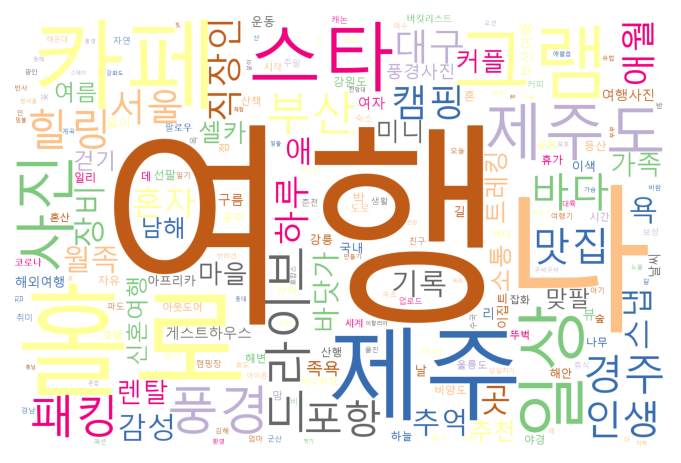

In [72]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
